In [1]:
%matplotlib inline

import numpy as np
import missingno as msno
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
print("Starting")
transactions = pd.read_csv('train_2016_v2.csv', parse_dates=['transactiondate'])
properties = pd.read_csv('properties_2016.csv')
print("done")

Starting


/Users/evanmt13/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


done


In [3]:
print(transactions.shape)
print(properties.shape)

(90275, 3)
(2985217, 58)


In [4]:
merged = pd.merge(transactions, properties, on="parcelid", how="left")
print(merged.shape)

(90275, 60)


In [5]:
merged = merged.select_dtypes(exclude=[object])
merged = merged.fillna(merged.mean())
merged = merged.dropna(axis=1, how='any')
merged

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.000000,7.229885,713.581395,2.0,3.0,4.0,4.000000,...,311.694737,1959.0,1.440739,122754.0,360170.0,2015.0,237416.0,6735.88,13.402692,6.037107e+13
1,14366692,-0.1684,2016-01-01,1.816372,7.229885,713.581395,3.5,4.0,4.0,5.565407,...,311.694737,2014.0,1.440739,346458.0,585529.0,2015.0,239071.0,10153.02,13.402692,6.049151e+13
2,12098116,-0.0040,2016-01-01,1.000000,7.229885,713.581395,3.0,2.0,4.0,4.000000,...,311.694737,1940.0,1.440739,61994.0,119906.0,2015.0,57912.0,11484.48,13.402692,6.037464e+13
3,12643413,0.0218,2016-01-02,1.000000,7.229885,713.581395,2.0,2.0,4.0,4.000000,...,311.694737,1987.0,1.440739,171518.0,244880.0,2015.0,73362.0,3048.74,13.402692,6.037296e+13
4,14432541,-0.0050,2016-01-02,1.816372,7.229885,713.581395,2.5,4.0,4.0,5.565407,...,311.694737,1981.0,2.000000,169574.0,434551.0,2015.0,264977.0,5488.96,13.402692,6.059042e+13
5,11509835,-0.2705,2016-01-02,1.000000,7.229885,713.581395,4.0,4.0,4.0,1.000000,...,311.694737,1982.0,1.440739,880650.0,2447951.0,2015.0,1567301.0,27126.57,13.402692,6.037621e+13
6,12286022,0.0440,2016-01-02,1.816372,7.229885,713.581395,1.0,2.0,4.0,7.000000,...,311.694737,1939.0,1.440739,64549.0,111521.0,2015.0,46972.0,2304.97,13.402692,6.037542e+13
7,17177301,0.1638,2016-01-02,1.816372,7.229885,713.581395,2.5,3.0,4.0,5.565407,...,311.694737,1994.0,2.000000,107000.0,306000.0,2015.0,199000.0,3745.50,13.402692,6.111003e+13
8,14739064,-0.0030,2016-01-02,1.816372,7.229885,713.581395,1.0,2.0,4.0,5.565407,...,311.694737,1984.0,1.440739,66834.0,210064.0,2015.0,143230.0,2172.88,13.402692,6.059042e+13
9,14677559,0.0843,2016-01-03,1.816372,7.229885,713.581395,2.0,2.0,4.0,5.565407,...,311.694737,1977.0,1.000000,109977.0,190960.0,2015.0,80983.0,1940.26,13.402692,6.059063e+13


In [6]:
try:
    merged = merged.drop('transactiondate', 1)
    parcels = merged['parcelid']
    merged = merged.drop('parcelid', 1)
    logError = merged['logerror'] # get the logError
    merged = merged.drop("logerror", 1)
except KeyError:
    print("Removed logerror")
print(logError)
merged

0        0.0276
1       -0.1684
2       -0.0040
3        0.0218
4       -0.0050
5       -0.2705
6        0.0440
7        0.1638
8       -0.0030
9        0.0843
10       0.3825
11      -0.0161
12       0.0344
13       0.0816
14      -0.0450
15       0.0020
16       0.0440
17      -0.0419
18      -0.0020
19       0.0100
20      -0.0387
21       0.0218
22       0.0149
23       0.1151
24      -0.1696
25      -0.0440
26      -0.0747
27       0.0080
28       0.0010
29      -0.0534
          ...  
90245    0.0953
90246    0.0139
90247    0.2095
90248    0.0080
90249   -0.1312
90250    0.0421
90251    0.0658
90252    0.0030
90253   -0.0294
90254   -0.0111
90255    0.0070
90256    0.0218
90257    0.0526
90258    0.0889
90259    0.0178
90260    0.0237
90261    0.0431
90262   -0.2231
90263    0.1398
90264    0.0478
90265   -0.3769
90266   -0.0030
90267    0.0010
90268   -0.0151
90269    0.0344
90270   -0.0356
90271    0.0070
90272   -0.2679
90273    0.0602
90274    0.4207
Name: logerror, Length: 

,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,1.000000,7.229885,713.581395,2.0,3.0,4.0,4.000000,2.0,66.0,1347.974037,...,311.694737,1959.0,1.440739,122754.0,360170.0,2015.0,237416.0,6735.88,13.402692,6.037107e+13
1,1.816372,7.229885,713.581395,3.5,4.0,4.0,5.565407,3.5,66.0,1347.974037,...,311.694737,2014.0,1.440739,346458.0,585529.0,2015.0,239071.0,10153.02,13.402692,6.049151e+13
2,1.000000,7.229885,713.581395,3.0,2.0,4.0,4.000000,3.0,66.0,1347.974037,...,311.694737,1940.0,1.440739,61994.0,119906.0,2015.0,57912.0,11484.48,13.402692,6.037464e+13
3,1.000000,7.229885,713.581395,2.0,2.0,4.0,4.000000,2.0,66.0,1347.974037,...,311.694737,1987.0,1.440739,171518.0,244880.0,2015.0,73362.0,3048.74,13.402692,6.037296e+13
4,1.816372,7.229885,713.581395,2.5,4.0,4.0,5.565407,2.5,66.0,1347.974037,...,311.694737,1981.0,2.000000,169574.0,434551.0,2015.0,264977.0,5488.96,13.402692,6.059042e+13
5,1.000000,7.229885,713.581395,4.0,4.0,4.0,1.000000,4.0,66.0,1347.974037,...,311.694737,1982.0,1.440739,880650.0,2447951.0,2015.0,1567301.0,27126.57,13.402692,6.037621e+13
6,1.816372,7.229885,713.581395,1.0,2.0,4.0,7.000000,1.0,66.0,1347.974037,...,311.694737,1939.0,1.440739,64549.0,111521.0,2015.0,46972.0,2304.97,13.402692,6.037542e+13
7,1.816372,7.229885,713.581395,2.5,3.0,4.0,5.565407,2.5,66.0,853.000000,...,311.694737,1994.0,2.000000,107000.0,306000.0,2015.0,199000.0,3745.50,13.402692,6.111003e+13
8,1.816372,7.229885,713.581395,1.0,2.0,4.0,5.565407,1.0,66.0,1347.974037,...,311.694737,1984.0,1.440739,66834.0,210064.0,2015.0,143230.0,2172.88,13.402692,6.059042e+13
9,1.816372,7.229885,713.581395,2.0,2.0,4.0,5.565407,2.0,66.0,1347.974037,...,311.694737,1977.0,1.000000,109977.0,190960.0,2015.0,80983.0,1940.26,13.402692,6.059063e+13


In [7]:
cca = CCA(n_components=1)
cca
cca.fit(merged, logError)
cca.score(merged, logError)

0.004096678682541266

0.00536040399022


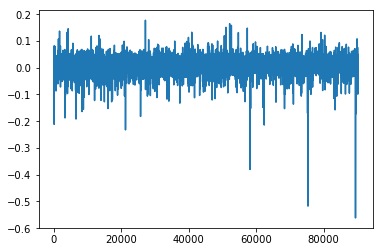

In [8]:
reg = linear_model.LinearRegression()
reg.fit(merged, logError)
yhat = reg.predict(merged)
print(reg.score(merged, logError))
plt.plot(yhat)
plt.show()

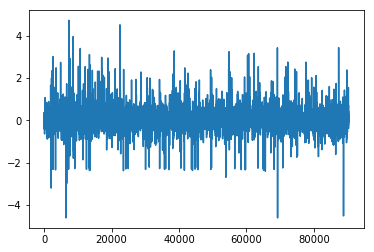

In [9]:
plt.plot(logError)
plt.show()

In [10]:
merged.keys()

Index(['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
       'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'structuretaxvaluedollarcnt', 'taxvalue